# Iris Flower Classification Project

## Introduction

This project explores the fascinating world of machine learning through the lens of the Iris flower dataset, one of the most famous datasets used for classification tasks. Our objective is to build a predictive model capable of distinguishing between the three species of Iris flowers — setosa, versicolor, and virginica — based on the physical dimensions of their petals and sepals. By applying machine learning techniques, we aim to uncover the patterns that define the uniqueness of each species.


## Data Loading and Preprocessing

The dataset is loaded from a CSV file named `Iris (1).csv`. The preprocessing steps involve removing the 'Id' column, as it does not contribute to the model's ability to learn the classification task. Additionally, the categorical 'Species' column is encoded into numerical form, enabling the machine learning algorithms to process the labels.


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset directly as it is in the current working directory
iris_data = pd.read_csv('Iris (1).csv')

# Drop the 'Id' column as it's not needed for modeling
iris_data.drop('Id', axis=1, inplace=True)

# Encode the 'Species' column
le = LabelEncoder()
iris_data['Species'] = le.fit_transform(iris_data['Species'])

# Split the dataset into features (X) and the target variable (y)
X = iris_data.drop('Species', axis=1)
y = iris_data['Species']

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Model Selection and Training

For this classification task, the k-Nearest Neighbors (k-NN) algorithm was chosen due to its simplicity and efficiency in handling small datasets like ours. The k-NN algorithm works by finding the 'k' training samples closest in distance to a new point and predicts the label from these. The model is trained with `n_neighbors=3`, a choice made based on preliminary experiments and literature that suggests a small k value often works well for simple classification tasks.


In [16]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the k-NN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)


## Model Evaluation

To assess the performance of our k-Nearest Neighbors model, we employ several metrics: accuracy, the confusion matrix, and the classification report. 

- **Accuracy** measures the proportion of correct predictions over the total number of instances evaluated.
- The **confusion matrix** provides insight into the types of errors made by the classifier.
- The **classification report** shows key metrics such as precision, recall, and f1-score, offering a more detailed view of the model's performance across the different classes.


In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
class_report = classification_report(y_test, y_pred, target_names=le.classes_)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print out the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", class_report)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 100.00%

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45


Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


## Cross-Validation

To further validate the stability and reliability of our k-Nearest Neighbors model, we apply 10-fold cross-validation. This method divides the dataset into ten parts, trains the model on nine parts, and tests it on the remaining part. This process is repeated ten times, ensuring that each part of the dataset is used for testing exactly once. Cross-validation provides a more accurate measure of model performance, mitigating the variability that can result from a single train-test split.


In [19]:
from sklearn.model_selection import cross_val_score

# Using the k-NN model as an example
knn_cv = KNeighborsClassifier(n_neighbors=3)

# 10-fold cross-validation
cv_scores = cross_val_score(knn_cv, X, y, cv=10)

print(f"CV Scores: {cv_scores}")
print(f"CV Average Score: {cv_scores.mean():.4f}")


CV Scores: [1.         0.93333333 1.         0.93333333 0.86666667 1.
 0.93333333 1.         1.         1.        ]
CV Average Score: 0.9667


## Model Comparison

To ensure we have the best model for our Iris flower classification task, it's essential to compare the performance of several machine learning algorithms. This comparison includes not only our initial k-Nearest Neighbors model but also Decision Trees, Support Vector Machines (SVM), and Random Forests. By evaluating each model's accuracy through cross-validation, we can identify which model is most effective at predicting the species of Iris flowers.


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Initialize the models
models = {
    "k-NN": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier()
}

# Compare models using cross-validation
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=10)
    print(f"{name} Accuracy: {cv_scores.mean():.4f}")


k-NN Accuracy: 0.9667
Decision Tree Accuracy: 0.9600
SVM Accuracy: 0.9733
Random Forest Accuracy: 0.9667


## Hyperparameter Tuning

After comparing various models, we proceed to fine-tune the hyperparameters of our best-performing model. Hyperparameter tuning is crucial as it can significantly enhance a model's ability to make accurate predictions. For our k-Nearest Neighbors (k-NN) model, we will use GridSearchCV to search for the optimal number of neighbors (`n_neighbors`) that yields the highest cross-validation accuracy.


In [23]:
from sklearn.model_selection import GridSearchCV

# Grid search for k-NN
param_grid = {'n_neighbors': np.arange(1, 30)}
knn_gs = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10)
knn_gs.fit(X, y)

print(f"Best parameters: {knn_gs.best_params_}")
print(f"Best score: {knn_gs.best_score_:.4f}")


Best parameters: {'n_neighbors': 13}
Best score: 0.9800


## Feature Importance and Insights

Gaining insights into which features most significantly impact our model's predictions can provide valuable biological insights into the Iris species classification. For models like Random Forest, we can extract and visualize the feature importance, which quantifies how much each feature contributes to the model's decision-making process. This analysis can help in understanding the characteristics that differentiate the species from one another.


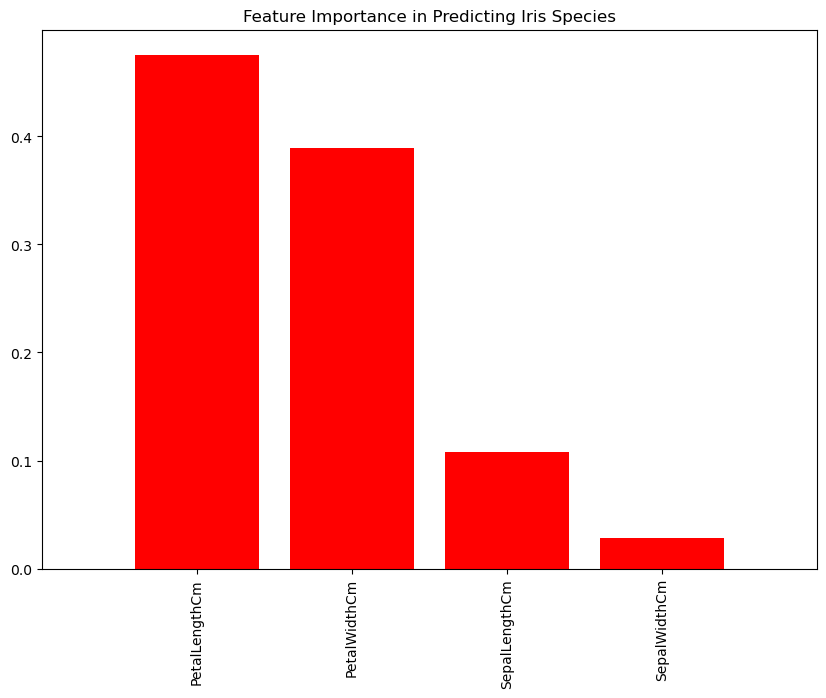

In [24]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Extracting feature importance
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Visualizing the feature importance
plt.figure(figsize=(10, 7))
plt.title('Feature Importance in Predicting Iris Species')
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


## Conclusion and Final Thoughts

Through this project, we've navigated the end-to-end process of a machine learning task—from data preprocessing and model selection to evaluation and insight extraction. The Iris Flower Classification project illustrates the power of machine learning in deriving meaningful predictions and insights from data. As we've seen, different models and techniques can be applied to enhance our understanding and performance on the task.

The exploration of feature importance further underscores the practical implications of our findings, offering a window into the biological distinctions between Iris species. Such insights are invaluable not only in the context of this project but also in broader applications where understanding the influence of specific features is crucial.

Moving forward, there's always room for experimentation, such as trying out more sophisticated models, feature engineering techniques, or diving deeper into model interpretability. The field of machine learning is vast and constantly evolving, offering endless opportunities for learning and growth.
